In [2]:
!pip install h5py

In [3]:
import numpy as np
import keras

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10

(pics, labels), _ = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [5]:
pics.shape

(50000, 32, 32, 3)

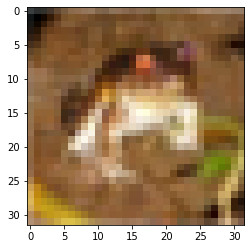

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(pics[0])

# Let's Prep our Pics #

In [11]:
pics[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
pics = pics.astype('float32')
pics /= 255
pics.shape

(50000, 32, 32, 3)

In [13]:
pics[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

# Now Let's get our Labels Ready #

In [17]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

number_of_classes = len(class_names)

class_names[labels[0][0]]

'frog'

In [18]:
# Now we need to one_hot_encode the labels...
labels = keras.utils.to_categorical(labels, number_of_classes)
print(labels[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [19]:
def labelToTest(_label):
    print(class_names[np.argmax(_label)])
    
labelToTest(labels[0])

frog


# Now Let's Build our Model #

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.layers import MaxPooling2D, Dropout

model = Sequential()

# OUR FIRST COLLECTION OF LAYERS
model.add( Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu' ))
model.add( Conv2D(32, (3,3), padding='same', activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# SECOND LAYER, SAME AS FIRST EXCEPT FOR TWICE THE FEATURE MAPS
model.add( Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add( Conv2D(64, (3,3), padding='same', activation='relu' ))
model.add( MaxPooling2D( pool_size=(2,2)))
model.add( Dropout(0.25))

# NOW LET'S START FORCING THE MODEL TO CONVERGE ON 1 of !0 CLASS NAMES
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

# OUR MODEL IS FINISHED. LET'S TELL KERAS TO COMPILE IT
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
batch_size = 128

def TrainingLoop(number_of_epochs):
    model.fit(pics, labels, \
              batch_size=batch_size, \
              epochs=number_of_epochs, \
              verbose=1, \
              validation_split=.1 )
    
TrainingLoop(1)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/1
45000/45000 [==============================] - 7s 150us/step - loss: 1.6569 - acc: 0.3903 - val_loss: 1.2746 - val_acc: 0.5564


In [30]:
TrainingLoop(10)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 4s 90us/step - loss: 0.5530 - acc: 0.8033 - val_loss: 0.6356 - val_acc: 0.7842
Epoch 2/10
45000/45000 [==============================] - 4s 88us/step - loss: 0.5203 - acc: 0.8147 - val_loss: 0.6071 - val_acc: 0.7930
Epoch 3/10
45000/45000 [==============================] - 4s 88us/step - loss: 0.4995 - acc: 0.8207 - val_loss: 0.6257 - val_acc: 0.7890
Epoch 4/10
45000/45000 [==============================] - 4s 87us/step - loss: 0.4808 - acc: 0.8272 - val_loss: 0.6011 - val_acc: 0.7984
Epoch 5/10
45000/45000 [==============================] - 4s 88us/step - loss: 0.4468 - acc: 0.8406 - val_loss: 0.6208 - val_acc: 0.8006
Epoch 6/10
45000/45000 [==============================] - 4s 88us/step - loss: 0.4373 - acc: 0.8437 - val_loss: 0.6092 - val_acc: 0.7952
Epoch 7/10
45000/45000 [==============================] - 4s 87us/step - loss: 0.4200 - acc: 0.8512 - val_loss: 0.6208 - val_acc:

In [24]:
test_image = pics[42000]
test_image.shape

(32, 32, 3)

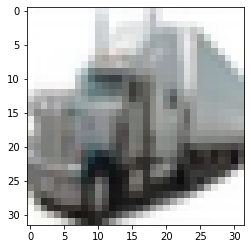

In [25]:
plt.imshow(test_image)

In [26]:
test_image_batch = np.expand_dims(test_image, axis=0)
test_image_batch.shape

(1, 32, 32, 3)

In [27]:
result = model.predict(test_image_batch, batch_size=1, verbose=1)
result

1/1 [==============================] - 0s 57ms/step


array([[1.0333563e-08, 2.8107133e-05, 2.2796050e-10, 1.9475952e-08,
        3.2549687e-13, 6.0433910e-12, 6.6379435e-10, 1.7641192e-12,
        2.8438177e-07, 9.9997163e-01]], dtype=float32)

In [29]:
labelToTest(result)

truck


# WE NEED A LOT MORE TRAINING...

But our computers are a bit too slow. Let's figure out how to load 'pre-trained weights' into our model.

First, let's see what I did previously (on a much faster computer with external GPU) after I loaded this Jupyter Notebook and ran TrainingLoop(10). Once I felt the A.I. model had increased in accuracy to an acceptable degree, I saved the trained weights like this:


In [32]:
model.save_weights('dlfd_2019_cifar_weights.h5')

Assuming you have code for instantiating your model, you can then load the weights you saved from one computer running this notebook, into a model with the same architecture on a different computer, by sharing the weights file and doing this:

In [34]:
# model.load_weights('dlfd_2019_cifar_weights.h5')

Now let's test it again, with the weights we've trained over time on a faster system.

1/1 [==============================] - 0s 2ms/step
horse


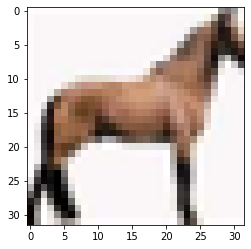

In [38]:
test_image = pics[22501]

test_image_batch = np.expand_dims( test_image, axis=0)
result = model.predict( test_image_batch, batch_size=1, verbose=1)
labelToTest(result)
plt.imshow(test_image)